In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics  import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [105]:
def decimal_to_hms(time):
    seconds = int(time * 3600)
    return str(timedelta(seconds=seconds))

# 20180612

In [82]:
df612 = pd.read_csv('20180612.csv')

In [83]:
df612 = df612.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df612 = df612.drop(['mean'], axis = 1)
df612 = df612.dropna()

In [5]:
df612

,time,mass
0,-7.360657e-05,0.092030
1,0.000000e+00,0.092264
2,5.547206e-07,0.092465
3,4.963742e-06,0.092591
4,1.107905e-05,0.092631
...,...,...
757171,2.103153e+00,0.292527
757172,2.103154e+00,0.292558
757173,2.103155e+00,0.292708
757174,2.103165e+00,0.292708


In [24]:
df612['time'] = df612['time'].apply(decimal_to_hms)

In [25]:
df612.set_index('time', inplace=True)

In [84]:
df612 = df612[df612['mass']>0]

In [85]:
analysis = df612[['mass']].copy()

In [95]:
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", period = 200000)

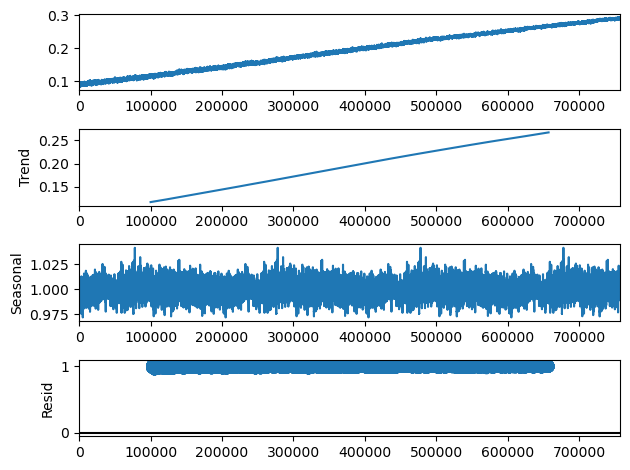

In [96]:
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
train_size = int(len(df612) * 0.95)
train = df612[:train_size]
test = df612[train_size:]

In [ ]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [ ]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [ ]:
predictions = model_fit.forecast(len(test))

In [ ]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


In [ ]:
# Visualize the results
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
forecast = model_fit.forecast(steps=38300)
forecast

In [ ]:
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.legend()
plt.show()

# 20180711

In [40]:
df11 = pd.read_csv('20180711.csv')

In [41]:
df11 = df11.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df11 = df11.drop(['mean'], axis = 1)
df11 = df11.dropna()

In [42]:
df11

,time,mass
0,-7.516583e-05,0.042978
1,0.000000e+00,0.043159
2,5.556477e-07,0.043285
3,8.340677e-07,0.043392
4,1.112223e-06,0.043424
...,...,...
980778,2.724269e+00,0.099858
980779,2.724270e+00,0.099167
980780,2.724271e+00,0.097943
980781,2.724281e+00,0.097541


In [ ]:
df11['time'] = df11['time'].apply(decimal_to_hms)

In [43]:
df11 = df11[df11['mass']>0]

In [44]:
df11.set_index('time', inplace=True)

In [46]:
sdc = df11[['mass']].copy()

In [47]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

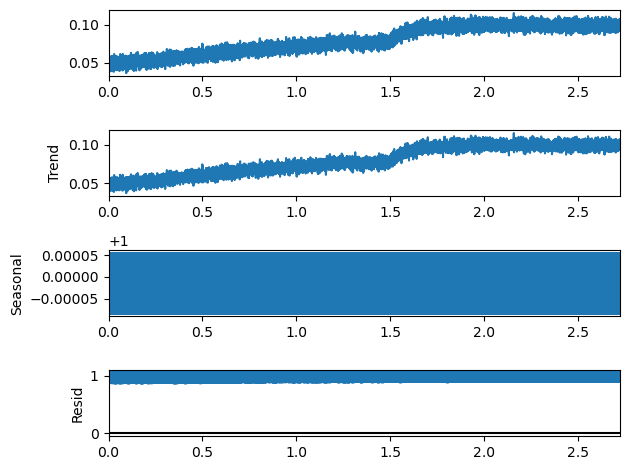

In [48]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

In [ ]:
train_size = int(len(df11) * 0.95)
train = df11[:train_size]
test = df11[train_size:]

In [ ]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [ ]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [ ]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [ ]:

# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


In [ ]:
# Visualize the results
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
forecast = model_fit.forecast(steps= 50000)
forecast

In [ ]:
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.legend()
plt.show()

# 20180712

In [49]:
df712 = pd.read_csv('20180712.csv')

In [50]:
df712 = df712.rename(columns={'Time [h]': 'time', 'Mass [ng]': 'mass', 'Mean mass [ng]' : 'mean'})
df712 = df712.drop(['mean'], axis = 1)
df712 = df712.dropna()

In [12]:
df712

,time,mass
0,-6.654859e-05,0.091996
1,0.000000e+00,0.091949
2,2.784199e-07,0.091937
3,5.568398e-07,0.091909
4,8.348624e-07,0.091833
...,...,...
692620,1.923856e+00,0.153420
692621,1.923857e+00,0.153644
692622,1.923857e+00,0.153848
692623,1.923865e+00,0.154023


In [ ]:
#df712['time'] = df712['time'].apply(decimal_to_hms)

In [51]:
df712 = df712[df712['mass']>0]

In [52]:
df712.set_index('time', inplace=True)

In [53]:
sdc = df712[['mass']].copy()

In [54]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

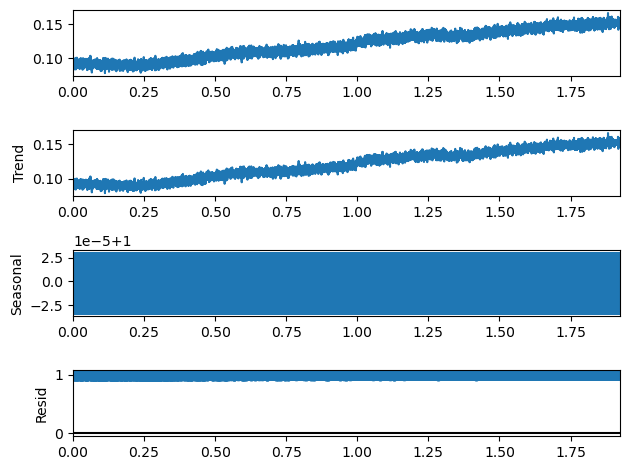

In [55]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

In [ ]:
train_size = int(len(df712) * 0.95)
train = df712[:train_size]
test = df712[train_size:]

In [ ]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [ ]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [ ]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [ ]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


In [ ]:
# Visualize the results
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
forecast = model_fit.forecast(steps= 35000)
forecast

In [ ]:
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
plt.plot(forecast)
plt.title('Forecasted Period', fontsize=15)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.legend()
plt.show()

# 20191017 (Yeast 1)

In [56]:
df17Y1 = pd.read_csv('20191017Y1.csv')

In [57]:
df17Y1 = df17Y1.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df17Y1 = df17Y1.drop(['mean'], axis = 1)
df17Y1 = df17Y1.dropna()

In [ ]:
#df17Y1['time'] = df17Y1['time'].apply(decimal_to_hms)

In [58]:
df17Y1 = df17Y1[df17Y1['mass']>0]

In [59]:
df17Y1 = df17Y1[['mass']].copy()

In [60]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

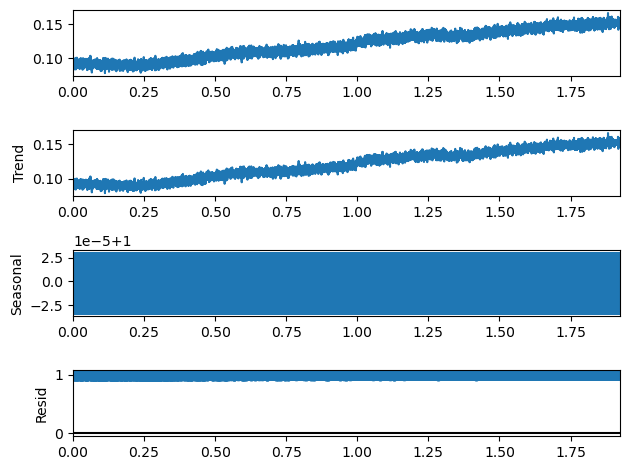

In [61]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

In [ ]:
df17Y1.set_index('time', inplace=True)

In [ ]:
train_size = int(len(df17Y1) * 0.95)
train = df17Y1[:train_size]
test = df17Y1[train_size:]

In [ ]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [ ]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [ ]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [ ]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

In [ ]:
# Visualize the results
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
forecast = model_fit.forecast(steps= 44000)
forecast

In [ ]:
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
plt.plot(forecast)
plt.title('Forecasted Period', fontsize=15)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.legend()
plt.show()

# 20191017 (Yeast 2)

In [62]:
df17Y2 = pd.read_csv('20191017Y2.csv')

In [63]:
df17Y2 = df17Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df17Y2 = df17Y2.drop(['mean'], axis = 1)
df17Y2 = df17Y2.dropna()

In [64]:
df17Y2 = df17Y2[df17Y2['mass']>0]

In [65]:
sdc = df17Y2[['mass']].copy()

In [66]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

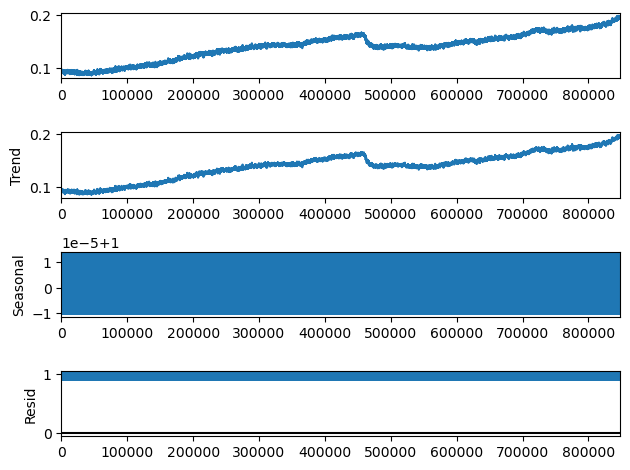

In [67]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

In [ ]:
df17Y2['time'] = df17Y2['time'].apply(decimal_to_hms)

In [ ]:
df17Y2.set_index('time', inplace=True)

In [ ]:
train_size = int(len(df17Y2) * 0.95)
train = df17Y2[:train_size]
test = df17Y2[train_size:]

In [ ]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [ ]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [ ]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [ ]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

In [ ]:
# Visualize the results
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
forecast = model_fit.forecast(steps= 44000)
forecast

In [ ]:
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
plt.plot(forecast)
plt.title('Forecasted Period', fontsize=15)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.legend()
plt.show()

# 20191018 (Yeast 2)

In [68]:
df18Y2 = pd.read_csv('20191018Y2.csv')

In [69]:
df18Y2 = df18Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df18Y2 = df18Y2.drop(['mean'], axis = 1)
df18Y2 = df18Y2.dropna()

In [70]:
df18Y2 = df18Y2[df18Y2['mass']>0]

In [71]:
sdc = df18Y2[['mass']].copy()

In [72]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

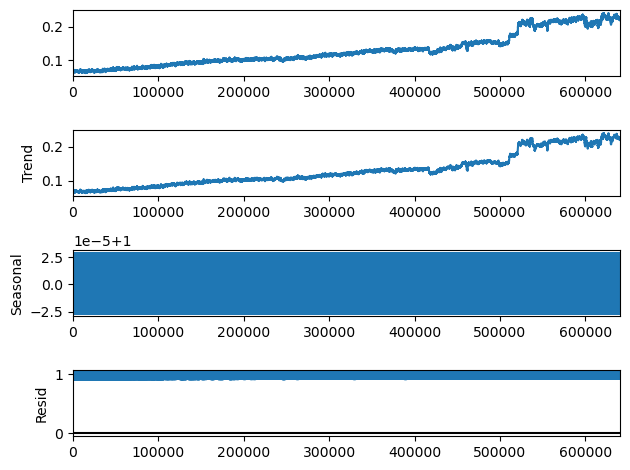

In [73]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

In [ ]:
df18Y2['time'] = df18Y2['time'].apply(decimal_to_hms)

In [ ]:
df18Y2.set_index('time', inplace=True)

In [ ]:
train_size = int(len(df18Y2) * 0.95)
train = df18Y2[:train_size]
test = df18Y2[train_size:]

In [ ]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [ ]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [ ]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [ ]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

In [ ]:
# Visualize the results
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
forecast = model_fit.forecast(steps= 33000)
forecast

In [ ]:
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
plt.plot(forecast)
plt.title('Forecasted Period', fontsize=15)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.legend()
plt.show()

# 20191021 (Yeast 1)

In [74]:
df21Y1 = pd.read_csv('20191021Y1.csv')

In [75]:
df21Y1 = df21Y1.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df21Y1 = df21Y1.drop(['mean'], axis = 1)
df21Y1 = df21Y1.dropna()

In [76]:
df21Y1 = df21Y1[df21Y1['mass']>0]

In [77]:
sdc = df21Y1[['mass']].copy()

In [78]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

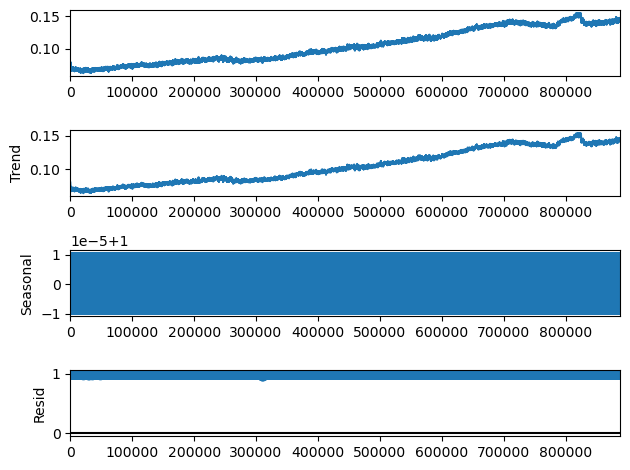

In [79]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

In [ ]:
df21Y1['time'] = df21Y1['time'].apply(decimal_to_hms)

In [ ]:
df21Y1.set_index('time', inplace=True)

In [ ]:
train_size = int(len(df21Y1) * 0.95)
train = df21Y1[:train_size]
test = df21Y1[train_size:]

In [ ]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [ ]:

# Create the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [ ]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [ ]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

In [ ]:
# Visualize the results
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
forecast = model_fit.forecast(steps= 44000)
forecast

In [ ]:
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [ ]:
plt.plot(forecast)
plt.title('Forecasted Period', fontsize=15)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.legend()
plt.show()